In [1]:
## from urllib.request import urlretrieve
## urlretrieve("https://raw.githubusercontent.com/dompazz/FinTech590-RiskManagement/main/Week05/Project/problem1.csv", "problem1.csv")

In [2]:
## from urllib.request import urlretrieve
## urlretrieve("https://raw.githubusercontent.com/dompazz/FinTech590-RiskManagement/main/Week05/Project/portfolio.csv", "portfolio.csv")

In [3]:
## from urllib.request import urlretrieve
## urlretrieve("https://raw.githubusercontent.com/JasonFeng98/FinTech590-RiskManagement/main/Week04/DailyPrices.csv", "DailyPrices.csv")

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import argparse
from numpy import linalg as LA
import scipy.stats as st
from scipy.optimize import minimize

In [5]:
## Write VaR_ES function
import math 

def VaR_ES(x, alpha = 0.05):
    xs = np.sort(x)
    n = alpha * xs.shape[0]
    iup = math.ceil(n)
    idn = math.floor(n)
    VaR = (xs[iup] + xs[idn]) / 2
    
    xs1 = xs[0:idn]
    ES = xs1.mean()
    return -VaR, -ES
    

In [6]:
## Test
nSim = 10000
simNorm = np.random.normal(0, 0.05, nSim)
Return = VaR_ES(simNorm)
Return

(0.08318228165961443, 0.10428512475154328)

In [7]:
df1 = pd.read_csv('problem1.csv')
df1

,x
0,-0.002665
1,-0.045128
2,0.053635
3,0.010450
4,-0.016284
...,...
495,0.009279
496,-0.001121
497,0.075188
498,0.038520


In [8]:
## Fit a Normal Distribution
mean, std  = st.distributions.norm.fit(df1)

In [9]:
## Calculate the VaR and ES with normal fit 
nSim = 10000
fitNorm = np.random.normal(mean, std, nSim)
Return1 = VaR_ES(fitNorm)
Return1

(0.0813266230243529, 0.10159153175688097)

In [10]:
df, loc, scale = st.t.fit(df1)
Tdist = st.t.rvs(df=df, loc=loc, scale=scale, size=10000)
Tdist

array([ 0.00589461,  0.04810283, -0.04808271, ...,  0.03625834,
        0.00753976,  0.0552614 ])

In [11]:
Return2 = VaR_ES(Tdist)
Return2

(0.07419093537314676, 0.10960307781275606)

In [12]:
## VaR and ES for compare
NormVaR = Return1[0]
NormES = Return1[1]
TVaR = Return2[0]
TES = Return2[1]
print("Normal Distribution VaR: "+str(NormVaR))
print("T Distribution VaR: "+ str(TVaR))
print("Normal Distribution ES: "+ str(NormES))
print("T Distribution ES: "+ str(TES))

Normal Distribution VaR: 0.0813266230243529
T Distribution VaR: 0.07419093537314676
Normal Distribution ES: 0.10159153175688097
T Distribution ES: 0.10960307781275606


In [13]:
NormVaR1 = -Return1[0]
NormES1 = -Return1[1]
TVaR1 = -Return2[0]
TES1 = -Return2[1]

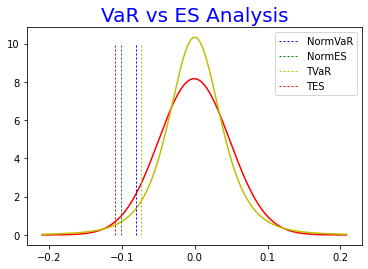

In [14]:
x = np.linspace(np.min(df1),np.max(df1),10000)
fitted_data1 = st.norm.pdf(x, mean, std)
fitted_data2 = st.t.pdf(x, df=df, loc=loc,scale=scale)
plt.plot(x,fitted_data1, "r-")
plt.plot(x,fitted_data2, "y-")
plt.title('VaR vs ES Analysis',fontsize=20, color = 'blue')
plt.plot([NormVaR1, NormVaR1], [0, 10], 'b-', lw=1,dashes=[2, 2], label="NormVaR")
plt.plot([NormES1, NormES1], [0, 10], 'g-', lw=1,dashes=[2, 2], label = "NormES")
plt.plot([TVaR1, TVaR1], [0, 10], 'y-', lw=1,dashes=[2, 2], label = "TVaR")
plt.plot([TES1, TES1], [0, 10], 'r-', lw=1,dashes=[2, 2], label = "TES")
plt.legend()

# Problem 2


In [15]:
## Import Library
%run Library.ipynb

In [16]:
## Testing

In [17]:
## Simulate returns assuming it follows a normal distribution
mu, sigma = 0, 0.02
n = 15000
ret = np.random.normal(mu, sigma, n-1)
pd.DataFrame(ret)
p0 = 100

In [18]:
## Classical Brownian Motion
## Simulation
price_c = ret + p0
pd.DataFrame(price_c)
par = get_best_distribution(price_c)[1]
par

p value for norm = 0.5055841874301297
p value for lognorm = 0.20326985231147854
Best fitting distribution: norm
Best p value: 0.5055841874301297
Parameters for the best fit: (99.99994442124347, 0.019948340423376967)


(99.99994442124347, 0.019948340423376967)

In [19]:
## Arithmetic Return
price_dis = (1 + ret) * p0
pd.DataFrame(price_dis)
par_dis = get_best_distribution(price_dis)[1]

p value for norm = 0.5055841874485223
p value for lognorm = 0.7963358588385717
Best fitting distribution: lognorm
Best p value: 0.7963358588385717
Parameters for the best fit: (0.016039374833784942, -24.31669028697339, 124.29302697873828)


In [20]:
sigma_dis = sigma * p0
## Geometric Return
price_geo = p0 * np.exp(ret)
pd.DataFrame(price_geo)
par_geo = get_best_distribution(price_geo)[1]

p value for norm = 0.07192293695474017
p value for lognorm = 0.7269086294766379
Best fitting distribution: lognorm
Best p value: 0.7269086294766379
Parameters for the best fit: (0.04332045658323988, 53.85012199761116, 46.1249974646397)


In [21]:
exp_mean = np.log(p0)
exp_mean

4.605170185988092

In [22]:
df1 = pd.read_csv('DailyPrices.csv')
df2 = df1[['Date','INTC']]
Return = return_calculate(df2, "DISCRETE", 'Date' )
Return

,Date,INTC
1,2021-10-21 00:00:00,0.011378
2,2021-10-22 00:00:00,-0.116786
3,2021-10-25 00:00:00,-0.001011
4,2021-10-26 00:00:00,-0.022870
5,2021-10-27 00:00:00,-0.008078
6,2021-10-28 00:00:00,0.003967
7,2021-10-29 00:00:00,0.019135
8,2021-11-01 00:00:00,0.011224
9,2021-11-02 00:00:00,0.006256
10,2021-11-03 00:00:00,0.010630


In [23]:
df3 = Return['INTC']
## Calculate the mean of stock price
Mean = df3.mean()
## Each lines minus the mean
INTC = df3 - Mean
## Calculate the standard deviation
STD = INTC.std()

In [24]:
# VaR with normal distribution
import scipy.stats as st
VaR_05 = st.norm.ppf(0.05, 0, STD)
VaR_01 = st.norm.ppf(0.01, 0, STD)
print(VaR_05, VaR_01)

-0.03443685422561183 -0.048704700104460985


In [25]:
n = df3.shape
## VaR with normal distribution with exp weighted variance
w = np.empty(n, dtype = float)
## Calculate the mean for column
## Each x delete it stock return mean
x = INTC
n = INTC.shape[0]
lam = 0.94
# Calculate the weighted
for i in range (0,n):
    w[i] = (1 - lam)*lam**(n-i-1)
w = w / sum(w)
## Change w shape (60, ) to (60, 1)
w = w[:, np.newaxis]
## make x to array for elementwise multiple
x1 = np.array(x)
x1 = x1[:, np.newaxis]
res = w*x1

## Transpose
#res = res.T
## matrix multiplication
res = res * x1
Sum = sum(res)
Sum
STD2 = np.sqrt(Sum)
STD2

array([0.01588418])

In [26]:
## VaR with normal distribution with exp weighted variance
VaR_05 = st.norm.ppf(0.05, 0, STD2)
VaR_01 = st.norm.ppf(0.01, 0, STD2)
print(VaR_05, VaR_01)

[-0.02612715] [-0.03695213]


In [27]:
## VaR with MLE
Fit_return = st.t.fit(INTC)
VaR_05 = st.t.ppf(0.05,Fit_return[0], Fit_return[1], Fit_return[2])
VaR_01 = st.t.ppf(0.01, Fit_return[0], Fit_return[1], Fit_return[2])
print(VaR_05, VaR_01)

-0.026299935811070388 -0.04919266232015989


In [28]:
## VaR using Historical Simulation
Sorted_Return = sorted(INTC)
Arr_Return = np.array(Sorted_Return)
n_05 = 0.05 * Arr_Return.shape[0]
n_01 = 0.01 * Arr_Return.shape[0]
VaR_05 = Arr_Return[int(n_05)]
VaR_01 = Arr_Return[int(n_01)]
print(VaR_05, VaR_01)

-0.020589182603003648 -0.11722477150145412


In [29]:
## Empirical Distribution  of Return, in sample
Arr_INTC = np.array(INTC)
VaR_05 = np.quantile(Arr_INTC, 0.05)
VaR_01 = np.quantile(Arr_INTC, 0.01)
print(VaR_05, VaR_01)

-0.020725168575353364 -0.06280041914884281


In [30]:
## Create a matrix
n = 500
sigma = np.full((n, n), 0.9)
for i in range(n):   
    sigma[i,i] = 1.0
sigma[1,2] = 0.7357
sigma[2,1] = 0.7357

In [31]:
import numpy.linalg as li

def is_psd(x):
    return np.all(li.eigvals(x) >= -1e-8)

In [32]:
## Calculate running time
import time

def F_norm (cov, cov_psd):
    temp = cov - cov_psd
    return LA.norm(temp, 'fro')

start1 = time.time()

near = near_psd(sigma)
is_psd(near)

end1 = time.time()

start2 = time.time()

hig = higham_nearestPSD(sigma)
is_psd(hig)

end2 = time.time()

running = []
running.append(end1 - start1)
running.append(end2 - start2)

Converged in 26 iterations.



In [33]:
from numpy import linalg as li

def F_norm (cov, cov_psd):
    temp = cov - cov_psd
    return li.norm(temp, 'fro')

In [34]:
#Calculate Norm
norm = []
norm.append(F_norm(sigma, near))
norm.append(F_norm(sigma, hig))
norm

[0.6275226557663726, 0.08964799527300794]

In [35]:
name = ['Near_Psd', 'Higham2002_psd']
result = pd.DataFrame(list(zip(name, norm, running)), columns = ['Name', 'Norm', 'Time'])
result

,Name,Norm,Time
0,Near_Psd,0.627523,0.258356
1,Higham2002_psd,0.089648,4.150999


# Problem 3

In [36]:
#import DailyPrices.csv，Portfolio.csv
prices = pd.read_csv("DailyPrices.csv")
portfolio = pd.read_csv("Portfolio.csv")
portfolio1 = pd.read_csv("Portfolio.csv")

In [37]:
## Reading the Daily Prices Data and calculate the Return
Return = return_calculate(prices, "DISCRETE", 'Date' )
Return

,Date,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
1,2021-10-21 00:00:00,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
2,2021-10-22 00:00:00,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
3,2021-10-25 00:00:00,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
4,2021-10-26 00:00:00,0.000900,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
5,2021-10-27 00:00:00,-0.004430,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786
6,2021-10-28 00:00:00,0.009649,0.024992,0.003651,0.015941,0.037751,-0.002520,-0.002039,0.015054,0.020040,...,0.000658,0.009273,-0.061474,0.011733,0.008537,0.001360,-0.000223,-0.000369,0.013966,0.009913
7,2021-10-29 00:00:00,0.002029,-0.018156,0.022414,-0.021511,0.034316,0.015064,0.014655,0.020983,0.025099,...,-0.009481,-0.003445,-0.010543,0.005972,-0.036531,0.002806,-0.008829,0.003503,-0.006574,0.004448
8,2021-11-01 00:00:00,0.001720,-0.005607,-0.006785,-0.016107,0.084910,-0.030727,-0.030326,0.019810,0.010169,...,-0.001848,0.002799,-0.001360,0.008646,0.011714,-0.004183,0.008757,0.019475,0.015125,0.017713
9,2021-11-02 00:00:00,0.004043,0.007116,0.011416,-0.001615,-0.030275,0.013488,0.014530,-0.005758,0.022225,...,-0.002564,0.007388,0.002270,0.016858,0.003961,-0.013961,0.015835,0.001802,-0.002018,0.010053
10,2021-11-03 00:00:00,0.006105,0.009799,0.002611,0.021508,0.035717,0.008014,0.006355,0.010790,0.007462,...,0.012375,0.015971,0.018347,0.004833,0.022914,0.015445,-0.002898,0.007375,0.013064,0.016488


In [38]:
## Subtract mean for each return
Return2 = Return.drop('Date', 1)
Return2 = Return2 - Return2.mean()
Return2 = Return.drop('SPY', 1)
Return2

,Date,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
1,2021-10-21 00:00:00,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,-0.002330,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
2,2021-10-22 00:00:00,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,0.008437,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
3,2021-10-25 00:00:00,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,0.003527,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
4,2021-10-26 00:00:00,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,0.002033,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
5,2021-10-27 00:00:00,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,-0.010555,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786
6,2021-10-28 00:00:00,0.024992,0.003651,0.015941,0.037751,-0.002520,-0.002039,0.015054,0.020040,0.006741,...,0.000658,0.009273,-0.061474,0.011733,0.008537,0.001360,-0.000223,-0.000369,0.013966,0.009913
7,2021-10-29 00:00:00,-0.018156,0.022414,-0.021511,0.034316,0.015064,0.014655,0.020983,0.025099,-0.009354,...,-0.009481,-0.003445,-0.010543,0.005972,-0.036531,0.002806,-0.008829,0.003503,-0.006574,0.004448
8,2021-11-01 00:00:00,-0.005607,-0.006785,-0.016107,0.084910,-0.030727,-0.030326,0.019810,0.010169,-0.002683,...,-0.001848,0.002799,-0.001360,0.008646,0.011714,-0.004183,0.008757,0.019475,0.015125,0.017713
9,2021-11-02 00:00:00,0.007116,0.011416,-0.001615,-0.030275,0.013488,0.014530,-0.005758,0.022225,0.005904,...,-0.002564,0.007388,0.002270,0.016858,0.003961,-0.013961,0.015835,0.001802,-0.002018,0.010053
10,2021-11-03 00:00:00,0.009799,0.002611,0.021508,0.035717,0.008014,0.006355,0.010790,0.007462,0.002744,...,0.012375,0.015971,0.018347,0.004833,0.022914,0.015445,-0.002898,0.007375,0.013064,0.016488


In [39]:
## Fit Models Functions
def fit_general_t(x):
    nu, m, s = st.t.fit(x)
    errorModel = st.t(nu, m, s)
    errors = x - m
    u = st.t.cdf(x, nu, m, s)
    return nu, m, s, u, errorModel


In [40]:
# Fit Stock Data
Stock = portfolio["Stock"]
fittedModels = dict()
for stock in Stock:
    fittedModels[stock] = fit_general_t(Return2[stock])

In [41]:
U = pd.DataFrame()
for stock in Stock:
    U[stock] = fittedModels[stock][3]

In [42]:
U = np.matrix(U)
R = st.spearmanr(U)[0]

In [43]:
## Do Simulation
NSim = 5000
simU = pd.DataFrame(st.norm.cdf(simulate_pca(R, NSim, 1)), Stock).T

In [44]:
R

array([[ 1.        ,  0.50414004,  0.37688247, ..., -0.18010558,
         0.0030564 ,  0.16910253],
       [ 0.50414004,  1.        ,  0.32308975, ..., -0.32581273,
         0.00533482,  0.21178105],
       [ 0.37688247,  0.32308975,  1.        , ..., -0.01733815,
         0.30969714,  0.28830231],
       ...,
       [-0.18010558, -0.32581273, -0.01733815, ...,  1.        ,
         0.35676577,  0.29986107],
       [ 0.0030564 ,  0.00533482,  0.30969714, ...,  0.35676577,
         1.        ,  0.31480967],
       [ 0.16910253,  0.21178105,  0.28830231, ...,  0.29986107,
         0.31480967,  1.        ]])

In [45]:
## Simpulation Return 
simulationReturns = pd.DataFrame()
for stock in Stock:
    simulationReturns[stock] = np.quantile(fittedModels[stock][4].rvs(NSim), simU[stock])

In [46]:
simulationReturns

,AAPL,TSLA,FB,JPM,HD,BAC,XOM,AVGO,PEP,TMO,...,IBM,PLD,TGT,DE,MMM,F,LRCX,MO,LMT,TFC
0,0.015448,-0.049216,0.010080,-0.013844,-0.006308,0.021791,0.008637,-0.013662,0.002938,-0.000423,...,-0.000174,0.013670,-0.013359,0.009832,-0.001664,-0.015251,-0.037723,0.020184,0.009318,0.001428
1,0.002841,0.003178,-0.003705,0.012435,-0.022972,-0.003811,0.032505,-0.003539,0.005752,-0.018870,...,0.015861,-0.000526,-0.010297,-0.004754,0.006930,0.011471,0.190298,0.013011,0.003071,-0.000244
2,0.034756,0.013271,0.003390,-0.006779,-0.007968,0.003452,-0.012408,-0.008350,0.004411,0.033013,...,0.000115,-0.012578,-0.011582,-0.022623,0.002956,-0.014735,-0.166311,0.003045,-0.007887,0.008300
3,0.000350,0.059160,-0.022744,-0.011831,0.030433,-0.017671,-0.000890,0.017525,0.005976,-0.000463,...,-0.007999,0.011339,0.017724,0.010920,-0.003823,0.013434,-0.003480,0.018200,0.010195,0.009169
4,-0.000835,0.009918,-0.021130,0.047271,0.022913,-0.004003,0.012759,0.018009,-0.002256,-0.020844,...,-0.007689,0.006920,0.006944,0.025864,0.003631,0.044609,0.036275,0.013144,0.014564,0.010674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.011173,-0.002517,0.006513,0.004170,0.001743,0.003594,0.000973,0.001807,0.009393,-0.009208,...,0.005965,-0.011212,0.022868,0.039421,-0.004956,0.032975,0.056872,0.000393,-0.001548,-0.008155
4996,0.010884,0.010124,0.018397,-0.024375,0.008769,0.006808,-0.008053,0.001197,0.000463,0.007579,...,0.031390,0.000808,-0.000450,-0.006601,-0.002237,0.026913,-0.062187,-0.009676,-0.001299,0.013689
4997,0.023004,-0.023000,-0.000652,-0.016379,0.030347,0.006207,-0.019269,0.022714,0.001377,0.011295,...,0.007048,0.014558,0.017768,0.006568,0.002937,-0.049035,-0.166422,-0.004810,-0.003732,0.008454
4998,0.042727,0.014355,0.014103,-0.017737,0.006561,0.010967,-0.020688,0.011320,-0.001697,0.025103,...,-0.013419,0.011471,-0.008586,0.005574,0.003158,0.002155,-0.166523,-0.003490,-0.002561,0.020099


In [47]:
#Separate 3 portfolios into 3 dataframe
portA = portfolio.loc[portfolio['Portfolio'] == 'A']
portA = portA[["Stock","Holding"]]
portB = portfolio.loc[portfolio['Portfolio'] == 'B']
portB = portB[["Stock","Holding"]]
portC = portfolio.loc[portfolio['Portfolio'] == 'C']
portC = portC[["Stock","Holding"]]
portTotal = portfolio[["Stock","Holding"]]

In [48]:
#create dictionary for holdings in each portfolio
holdingsA = dict(portA.values)
holdingsB = dict(portB.values)
holdingsC = dict(portC.values)
holdingsTotal = dict(portTotal.values)

In [49]:
#check if some portfolios contains same stock
if len(portfolio["Stock"].unique()) < portfolio.shape[0]:
    print("some portfolios contains same stock")
else:
    print("portfolio contains all different stocks")

portfolio contains all different stocks


In [50]:
dateColumn = "Date"
var = list(prices.columns) #get column header names
nVar = len(var)
v = []
for i in range(0,nVar):
    if var[i] != dateColumn:
        v.append(var[i])

In [51]:
#filter prices and returns
nameA = set(v).intersection(list(holdingsA.keys()))
nameB = set(v).intersection(list(holdingsB.keys()))
nameC = set(v).intersection(list(holdingsC.keys()))
nameTotal = set(v).intersection(list(holdingsTotal.keys()))

current_prices = prices.iloc[-1:]

current_prices_A = current_prices[nameA]
current_prices_B = current_prices[nameB]
current_prices_C = current_prices[nameC]
current_prices_Total = current_prices[nameTotal]

returns_A = simulationReturns[simulationReturns.columns[simulationReturns.columns.isin(nameA)]]
returns_B = simulationReturns[simulationReturns.columns[simulationReturns.columns.isin(nameB)]]
returns_C = simulationReturns[simulationReturns.columns[simulationReturns.columns.isin(nameC)]]
returns_Total = simulationReturns[simulationReturns.columns[simulationReturns.columns.isin(nameTotal)]]

In [52]:
portTotal = portfolio[['Stock',"Holding"]]
df1 = portTotal
data2 = {'Iteration': range(1,5001)}
df2 = pd.DataFrame(data2)
df1['key'] = 1
df2['key'] = 1

values = pd.merge(df1, df2, on = 'key').drop("key", 1)
values

,Stock,Holding,Iteration
0,AAPL,58,1
1,AAPL,58,2
2,AAPL,58,3
3,AAPL,58,4
4,AAPL,58,5
...,...,...,...
499995,TFC,149,4996
499996,TFC,149,4997
499997,TFC,149,4998
499998,TFC,149,4999


In [53]:
nVals = values.shape[0]
currentValue = np.empty(nVals, dtype = float)
simulatedValue = np.empty(nVals, dtype = float)
pnl = np.empty(nVals, dtype = float)
for i in range(0, nVals):
    price = current_prices[values.iloc[i,0]]
    currentValue[i] = values.iloc[i,1] * price
    simulatedValue[i] = values.iloc[i,1] * price * (1.0 + simulationReturns[values.iloc[i,0]].iloc[values.iloc[i,2]-1])
    pnl[i] = simulatedValue[i] - currentValue[i]


In [54]:
values['currentValue'] = currentValue
values['simulatedValue'] = simulatedValue
values['pnl'] = pnl

In [55]:
values

,Stock,Holding,Iteration,currentValue,simulatedValue,pnl
0,AAPL,58,1,10038.060425,10193.124250,155.063825
1,AAPL,58,2,10038.060425,10066.583256,28.522831
2,AAPL,58,3,10038.060425,10386.939779,348.879354
3,AAPL,58,4,10038.060425,10041.571612,3.511187
4,AAPL,58,5,10038.060425,10029.681950,-8.378474
...,...,...,...,...,...,...
499995,TFC,149,4996,10044.090546,9962.180630,-81.909916
499996,TFC,149,4997,10044.090546,10181.584400,137.493854
499997,TFC,149,4998,10044.090546,10129.007981,84.917435
499998,TFC,149,4999,10044.090546,10245.963742,201.873197


In [56]:
it_port = pd.merge(values, portfolio1, on = 'Stock').drop("Holding_y",1)
it_port

,Stock,Holding_x,Iteration,currentValue,simulatedValue,pnl,Portfolio
0,AAPL,58,1,10038.060425,10193.124250,155.063825,A
1,AAPL,58,2,10038.060425,10066.583256,28.522831,A
2,AAPL,58,3,10038.060425,10386.939779,348.879354,A
3,AAPL,58,4,10038.060425,10041.571612,3.511187,A
4,AAPL,58,5,10038.060425,10029.681950,-8.378474,A
...,...,...,...,...,...,...,...
499995,TFC,149,4996,10044.090546,9962.180630,-81.909916,C
499996,TFC,149,4997,10044.090546,10181.584400,137.493854,C
499997,TFC,149,4998,10044.090546,10129.007981,84.917435,C
499998,TFC,149,4999,10044.090546,10245.963742,201.873197,C


In [57]:
it_A = it_port.loc[it_port['Portfolio'] == 'A'].groupby('Iteration')
it_B = it_port.loc[it_port['Portfolio'] == 'B'].groupby('Iteration')
it_C = it_port.loc[it_port['Portfolio'] == 'C'].groupby('Iteration')
it_all = it_port.groupby('Iteration')

In [58]:
totalValues_A = it_A.sum().drop("Holding_x", 1)
totalValues_B = it_B.sum().drop("Holding_x", 1)
totalValues_C = it_C.sum().drop("Holding_x", 1)
totalValues_all = it_all.sum().drop("Holding_x", 1)
totalValues_A

,currentValue,simulatedValue,pnl
Iteration,,,
1,364532.96043,365074.707152,541.746722
2,364532.96043,363571.601299,-961.359132
3,364532.96043,366169.907466,1636.947036
4,364532.96043,365640.155522,1107.195092
5,364532.96043,364546.056156,13.095726
...,...,...,...
4996,364532.96043,363923.513374,-609.447056
4997,364532.96043,365126.635083,593.674653
4998,364532.96043,365336.525578,803.565148


In [64]:
pnlA = totalValues_A['pnl']
pnlB = totalValues_B['pnl']
pnlC = totalValues_C['pnl']
pnlAll = totalValues_all['pnl']

In [67]:
A = VaR_ES(pnlA)
B = VaR_ES(pnlB)
C= VaR_ES(pnlC)
D = VaR_ES(pnlAll)

In [71]:
print("PortfolioA VaR: "+str(A[0]))
print("PortfolioA ES: "+ str(A[1]))
print("PortfolioB VaR: "+str(B[0]))
print("PortfolioB ES: "+ str(B[1]))
print("PortfolioC VaR: "+str(C[0]))
print("PortfolioC ES: "+ str(C[1]))
print("PortfolioTotal VaR: "+str(D[0]))
print("PortfolioTotal ES: "+ str(D[1]))

PortfolioA VaR: 1721.644530201138
PortfolioA ES: 2702.0557226768246
PortfolioB VaR: 1301.3487403741074
PortfolioB ES: 1867.5890310419659
PortfolioC VaR: 2010.760765388066
PortfolioC ES: 2560.617974539322
PortfolioTotal VaR: 741.2078310677134
PortfolioTotal ES: 1440.1317872155025
